# TASK 1 – Top Cuisines (Cognifyz Internship)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
file_path = "Dataset.csv"
df = pd.read_csv(file_path)

print("Dataset loaded successfully!")
print("Rows:", df.shape[0], " Columns:", df.shape[1])
print("\nColumns available:", df.columns.tolist())

Dataset loaded successfully!
Rows: 9551  Columns: 21

Columns available: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


In [3]:
# Check for duplicates / missing
print("\nDuplicate rows:", df.duplicated().sum())
print("Missing values in 'Cuisines':", df['Cuisines'].isnull().sum())

# Data Cleaning
df['Cuisines'] = (
    df['Cuisines']
    .fillna('')
    .str.lower()
    .str.strip()
    .str.replace(r'[\/\|;]', ',', regex=True)
)

print("\nCleaning done! Sample values:")
print(df['Cuisines'].head(5).values)


Duplicate rows: 0
Missing values in 'Cuisines': 9

Cleaning done! Sample values:
['french, japanese, desserts' 'japanese'
 'seafood, asian, filipino, indian' 'japanese, sushi' 'japanese, korean']


In [4]:
# Using split and explode
df['Cuisines'] = df['Cuisines'].str.split(',')
df_exp = df.explode('Cuisines')

# Remove blank rows after explode
df_exp['Cuisines'] = df_exp['Cuisines'].str.strip()
df_exp = df_exp[df_exp['Cuisines'] != '']

print("Rows after explode:", len(df_exp))

Rows after explode: 19710


In [5]:
cuisine_counts = (
    df_exp.groupby('Cuisines')['Restaurant ID']
    .nunique()
    .reset_index(name='Restaurant_Count')
    .sort_values('Restaurant_Count', ascending=False)
)

total_restaurants = df['Restaurant ID'].nunique()
cuisine_counts['Percentage'] = (cuisine_counts['Restaurant_Count'] / total_restaurants * 100).round(2)

top3 = cuisine_counts.head(3)
print("\n🏆 Top 3 Cuisines:")
print(top3)


🏆 Top 3 Cuisines:
         Cuisines  Restaurant_Count  Percentage
100  north indian              3960       41.46
34        chinese              2733       28.61
49      fast food              1986       20.79


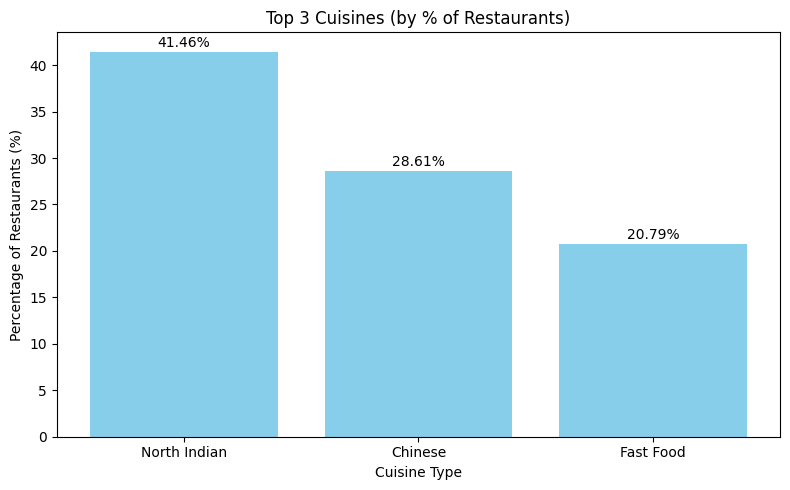

In [6]:
# Visualization
plt.figure(figsize=(8,5))
plt.bar(top3['Cuisines'].str.title(), top3['Percentage'], color='skyblue')
plt.title("Top 3 Cuisines (by % of Restaurants)")
plt.xlabel("Cuisine Type")
plt.ylabel("Percentage of Restaurants (%)")

# Add percentage labels
for i, v in enumerate(top3['Percentage']):
    plt.text(i, v + 0.5, f"{v}%", ha='center')

plt.tight_layout()
plt.savefig("top3_cuisines_chart.png", bbox_inches='tight')
plt.show()